In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import string
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [81]:
!apt install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [4]:
!unzip  /content/Fake.csv.zip -d /content/Fake.csv

Archive:  /content/Fake.csv.zip
  inflating: /content/Fake.csv/Fake.csv  


In [14]:
!unzip  /content/sample_data/True.csv.zip -d /content/True.csv

Archive:  /content/sample_data/True.csv.zip
  inflating: /content/True.csv/True.csv  


In [82]:
df1 = pd.read_csv(r"/content/Fake.csv/Fake.csv")

In [83]:
df2 = pd.read_csv(r"/content/True.csv/True.csv")

In [84]:
df1["class"] = 0

In [85]:
df2["class"] = 1

In [86]:
df1.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [87]:
df2.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [88]:
print(df1.shape,df2.shape)

(23481, 5) (21417, 5)


In [89]:
df1.describe()

,class
count,23481.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [90]:
df2.describe()

,class
count,21417.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [91]:
df1.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [92]:
df = pd.concat([df1, df2], join="inner")

In [93]:
df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [94]:
df.shape

(44898, 5)

<Axes: xlabel='class', ylabel='count'>

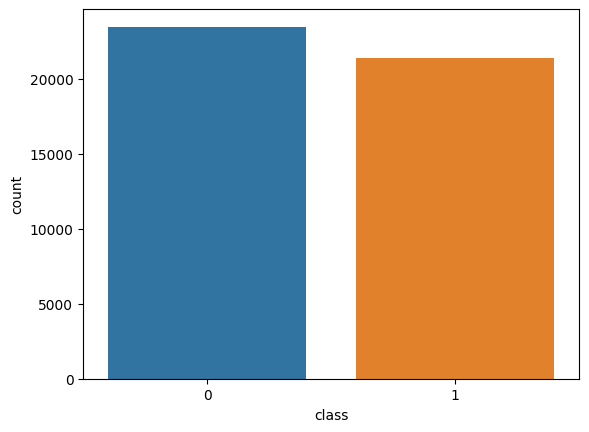

In [95]:
sns.countplot(x = "class", data = df)

In [96]:
df = shuffle(df).reset_index(drop=True)
df = df[["text","class"]]
df

,text,class
0,MOSCOW (Reuters) - The head of Russia s centra...,1
1,Protesters gathered Friday in Los Angeles for ...,0
2,WASHINGTON (Reuters) - Deputy U.S. Attorney Ge...,1
3,BEIJING (Reuters) - The White House on Wednesd...,1
4,Donald Trump recently went after the gun nut v...,0
...,...,...
44893,Donald Trump s financials and business venture...,0
44894,WASHINGTON/MOSCOW (Reuters) - The United State...,1
44895,We ve all had questions about Huma Abedin but ...,0
44896,SAN FRANCISCO (Reuters) - Oracle Corp (ORCL.N)...,1


In [97]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [98]:
df["text"] = df["text"].apply(wordopt)

In [99]:
x = df["text"]
y = df["class"]

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [101]:
x_train.head()

23258    kigali  reuters    a critic of rwandan preside...
37098    washington  reuters    constant cyber attacks ...
2462     comey will inevitably be remembered for the co...
33043    former fbi director james comey is  no doubt  ...
12484    based stickman  aka kyle chapman became famous...
Name: text, dtype: object

In [102]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
xv_test

<11225x95256 sparse matrix of type '<class 'numpy.float64'>'
	with 2287706 stored elements in Compressed Sparse Row format>

In [103]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(xv_train,y_train)

LogisticRegression()

In [104]:
y_pred = logistic_regression.predict(xv_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [105]:
f"{logistic_regression.score(xv_test, y_test)*100} % accuracy"

'98.74387527839643 % accuracy'

<Axes: >

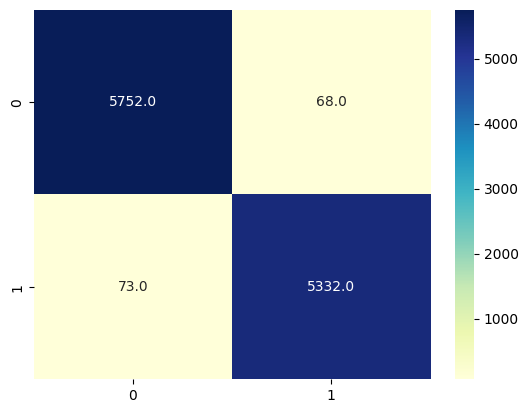

In [106]:
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True,  cmap="YlGnBu",fmt=".1f")

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5825
           1       0.99      0.99      0.99      5400

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [108]:
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(xv_train, y_train)

SVC(kernel='linear')

In [109]:
y_pred = svm_classifier.predict(xv_test)

In [110]:
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [111]:
f"{svm_classifier.score(xv_test, y_test)*100}% accuracy"

'99.43875278396436% accuracy'

In [112]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [113]:
y_pred = DT.predict(xv_test)

In [114]:
y_pred,y_test

(array([0, 0, 1, ..., 1, 1, 0]),
 26332    0
 34812    0
 10197    1
 34111    0
 31404    0
         ..
 14726    1
 9837     0
 28545    1
 44326    1
 16491    0
 Name: class, Length: 11225, dtype: int64)

In [115]:
f"{DT.score(xv_test, y_test)*100}% accuracy"

'99.67037861915368% accuracy'

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5825
           1       1.00      1.00      1.00      5400

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



<Axes: >

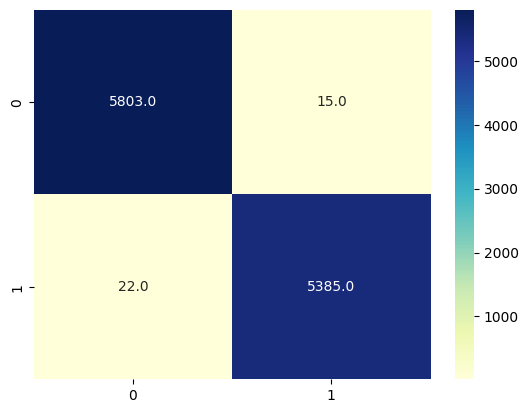

In [117]:
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True,  cmap="YlGnBu",fmt=".1f")

In [118]:
RFC = RandomForestClassifier(random_state=100)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=100)

In [119]:
y_pred = RFC.predict(xv_test)

In [120]:
RFC.score(xv_test, y_test)

0.9869933184855234

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5825
           1       0.99      0.98      0.99      5400

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



<Axes: >

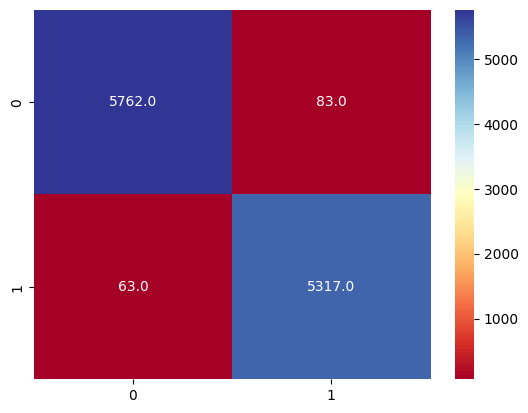

In [122]:
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True,  cmap="RdYlBu",fmt=".1f")

In [126]:
def Predict(text):
    processed_text = wordopt(text)

    userText = vectorization.transform([processed_text])

    model_lg = logistic_regression.predict(userText)
    model_lg = "-- Fake News" if model_lg[0] == 0 else "-- Not a fake news"

    model_svm = svm_classifier.predict(userText)
    model_svm = "-- Fake News" if model_svm[0] == 0 else "-- Not a fake news"

    model_DT = DT.predict(userText)
    model_DT = "-- Fake News" if model_DT[0] == 0 else "-- Not a fake news"

    model_RFC = RFC.predict(userText)
    model_RFC = "-- Fake News" if model_RFC[0] == 0 else "-- Not a fake news"

    return f"Predicted Output of Logistic Regression is {model_lg}\n Predicted Output of SVM is {model_svm} \n Predicted Output of Decision Tree is {model_DT} \n Predicted Output of RandomForest is {model_RFC}"



In [127]:
output = Predict("when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of steady growth triggered by a flurry of massive government contracts, OAS was ensnared in Operation Car Wash which unearthed an illegal contracting ring between state firms and builders. The ensuing scandal helped topple former Brazilian President Dilma Rousseff last year. Trained as an engineer, Mata Pires founded OAS with two colleagues in 1976 to do sub-contracting work for larger rival Odebrecht SA - the biggest of the builders involved in the probe.  Before the scandal, Forbes magazine estimated Mata Pires  fortune at $1.6 billion. He dropped off the magazine s billionaire list in 2015, months after OAS sought bankruptcy protection after the Car Wash scandal. While Mata Pires was never accused of wrongdoing in the investigations, creditors demanded he and his family stay away from the builder s day-to-day operations, people directly involved in the negotiations told Reuters at the time. He is survived by his wife and his two sons. ")
print(output)

Predicted Output of Logistic Regression is -- Not a fake news
 Predicted Output of SVM is -- Not a fake news 
 Predicted Output of Decision Tree is -- Not a fake news 
 Predicted Output of RandomForest is -- Not a fake news


In [128]:
output = Predict("Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, and CBS. Yet, these corporations function under many different brands, such as FOX, ABC, CNN, Comcast, Wall Street Journal, etc, giving people the perception of choice   As Tavistock s researchers showed, it was important that the victims of mass brainwashing not be aware that their environment was being controlled; there should thus be a vast number of sources for information, whose messages could be varied slightly, so as to mask the sense of external control. ~ Specialist of mass brainwashing, L. WolfeNew Brainwashing Tactic Called AstroturfWith alternative media on the rise, the propaganda machine continues to expand. Below is a video of Sharyl Attkisson, investigative reporter with CBS, during which she explains how  astroturf,  or fake grassroots movements, are used to spin information not only to influence journalists but to sway public opinion. Astroturf is a perversion of grassroots. Astroturf is when political, corporate or other special interests disguise themselves and publish blogs, start facebook and twitter accounts, publish ads, letters to the editor, or simply post comments online, to try to fool you into thinking an independent or grassroots movement is speaking. ~ Sharyl Attkisson, Investigative ReporterHow do you separate fact from fiction? Sharyl Attkisson finishes her talk with some insights on how to identify signs of propaganda and astroturfing  These methods are used to give people the impression that there is widespread support for an agenda, when, in reality, one may not exist. Astroturf tactics are also used to discredit or criticize those that disagree with certain agendas, using stereotypical names such as conspiracy theorist or quack. When in fact when someone dares to reveal the truth or questions the  official  story, it should spark a deeper curiosity and encourage further scrutiny of the information.This article (Journalist Reveals Tactics Brainwashing Industry Uses to Manipulate the Public) was originally created and published by Waking Times and is published here under a Creative Commons license with attribution to Vic Bishop and WakingTimes.com. It may be re-posted freely with proper attribution, author bio, and this copyright statement. READ MORE MSM PROPAGANDA NEWS AT: 21st Century Wire MSM Watch Files")
print(output)

Predicted Output of Logistic Regression is -- Fake News
 Predicted Output of SVM is -- Fake News 
 Predicted Output of Decision Tree is -- Fake News 
 Predicted Output of RandomForest is -- Fake News
